# The problem of Colonel Kurtz (Stachurski Ch. 5)

- $ W_t \in \{ 0, \ldots, B \} $ is the random quantity of fish Kurtz can catch in the morning of day $t$, distributed with pdf $\phi$ iid over time.
- $X_t$ Stock of fish at noon of day $t$.
- $C_t$ fish consumption on the afternoon of day $t$
- $R_t$ remainder of fish after consumption, which is frozen. The maximum he can save is denoted by $M$. 
Therefore, 

Thus, we have defined a state space $\mathcal{X} = \{ 0, \ldots, M+B \}$ and the evolution of the state variable $X$ is governed by
$$ X' = R + W' = X - C + W' $$

Every day, after catching $W_t$ fish, the Colonel decides how much to save $R_t = a(X_t)$. Note that we are considering stationary policies that take the form of a function $ a: \mathcal{X} \rightarrow \mathcal{A} = \{ 0, \ldots, M \}$. The problem can be written as
$$
\max_a  E \bigg[ \sum_{t=0} ^\infty \rho ^t u(X_t - a(X_t) \bigg] = \max_a  E \bigg[ \sum_{t=0} ^\infty \rho ^t u(C_t) \bigg]
$$
subject to
$$ X' = a(X) + W' $$

giving the familiar Bellman equation:
$$
V(x) = \max_{a \in \Gamma(x)}[ u(x-a) + \rho \int V(x')dQ(x'|a,x)]
$$

where $\Gamma(x)$ is the set of available actions when the sate is $x$. That is, $\Gamma(x) = \{ 0,1,\ldots, \min\{x,M\} \}$.    Note that $q(\cdot|a,x)$ is fully determined by $a$ and $\phi$, so we can rewrite the Bellman equation as:
$$
V(x) = \max_{a \in \Gamma(x)} [  u(x-a) + \rho \sum_{z=0} ^B V(a+z)\phi(z)  ]
$$

We solve (not estimate) the Colonel's problem (finding the optimal stationary policy and the correponding value function) using both value function iteration and policy iteration. In our computation, we assume that $W_t$ has a discrete uniform distribution. Furthermore, assume that the flow utility takes the simple parametric form:
$$
u(c) = c^\beta
$$
where $\beta$ is a known parameter.

## Settings

In [2]:
global beta rho B M S Z
beta = 0.5; % flow utility parameter
rho = 0.9;
B = 10;
M = 5;
S = [0:B+M];  % State space = 0,...,B + M
Z = [0:B];    % Shock space = 0,...,B

## Value Function Iteration


alpha =

     0     0     0     0     1     1     1     2     2     3     3     4     5     5     5     5




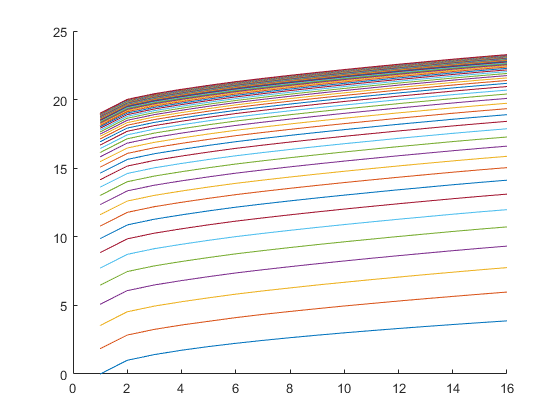

In [3]:
v = zeros(1, 16); 
err = 1;
figure()
while err > 10^-6
    [vNew,alpha] = bellman(v);
    err = max(abs(vNew - v));
    v = vNew;
    hold on;
    plot(v);
end
alpha

## Policy iteration

In [ ]:
alphaIn = zeros(1,16); % initialize
figure()
while 0~=1
    v_alpha = policyEval(alphaIn);
    hold on;
    plot(v_alpha);
    [~, alphaOut] = bellman(v_alpha);
    if alphaIn==alphaOut
        break
    else
       alphaIn=alphaOut;
    end
end
alphaOut